# Load Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [5]:
totalClass=10
shufflePixels = False
shuffleLabels = False

In [6]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


Populating the interactive namespace from numpy and matplotlib


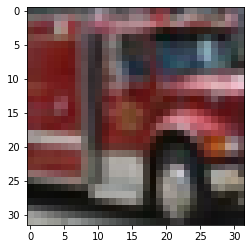

In [7]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

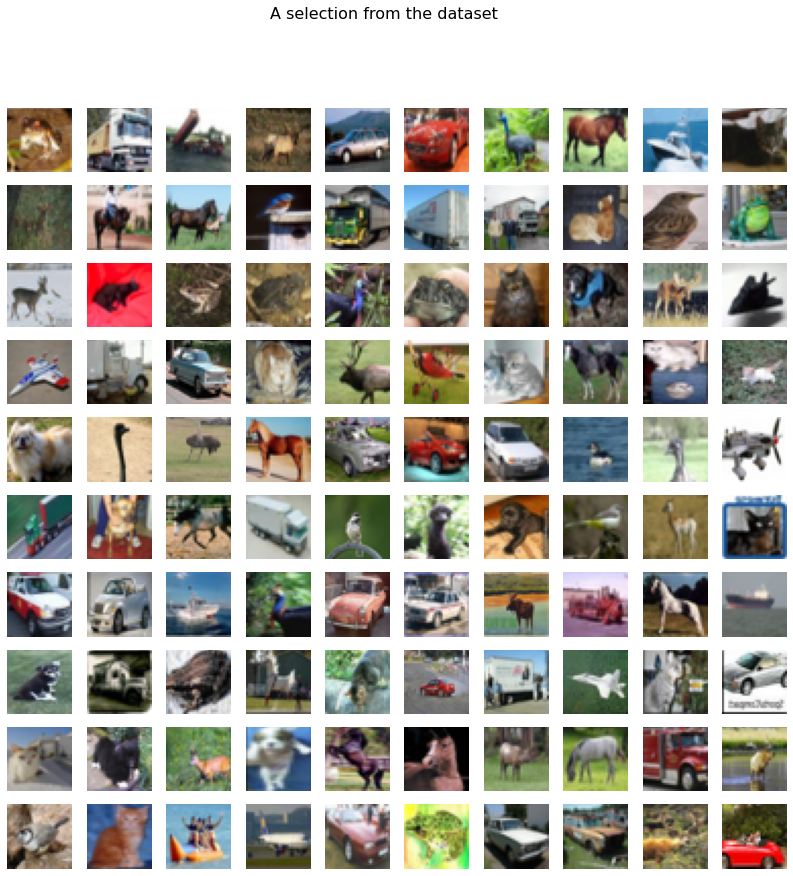

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [9]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [10]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 13s 38ms/step - loss: 2.3071 - accuracy: 0.0770
test loss, test acc: [2.307065010070801, 0.0769599974155426]
Evaluate on test data
20/20 [==============================] - 1s 67ms/step - loss: 2.3070 - accuracy: 0.0833
test loss, test acc: [2.3069872856140137, 0.08330000191926956]


In [11]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 18s 31ms/step - loss: 2.0629 - accuracy: 0.2407 - val_loss: 1.7196 - val_accuracy: 0.3842
Epoch 2/250
500/500 [==============================] - 15s 31ms/step - loss: 1.6741 - accuracy: 0.3959 - val_loss: 1.4715 - val_accuracy: 0.4602
Epoch 3/250
500/500 [==============================] - 15s 31ms/step - loss: 1.4596 - accuracy: 0.4755 - val_loss: 1.3708 - val_accuracy: 0.5091
Epoch 4/250
500/500 [==============================] - 15s 30ms/step - loss: 1.3086 - accuracy: 0.5338 - val_loss: 1.2144 - val_accuracy: 0.5750
Epoch 5/250
500/500 [==============================] - 15s 30ms/step - loss: 1.1724 - accuracy: 0.5843 - val_loss: 1.1337 - val_accuracy: 0.6008
Epoch 6/250
500/500 [==============================] - 15s 30ms/step - loss: 1.0586 - accuracy: 0.6244 - val_loss: 1.0525 - val_accuracy: 0.6283
Epoch 7/250
500/500 [==============================] - 15s 30ms/step - loss: 0.9446 - accuracy: 0.6686 - val_loss: 1.0140 - val_ac

In [12]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 3s 29ms/step - loss: 5.4567e-07 - accuracy: 1.0000
test loss, test acc: [5.456726057673222e-07, 1.0]
Evaluate on test data
20/20 [==============================] - 1s 29ms/step - loss: 2.8632 - accuracy: 0.7494
test loss, test acc: [2.8632354736328125, 0.7494000196456909]


# Small

In [58]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 1s 7ms/step - loss: 21.7150 - accuracy: 0.0951
test loss, test acc: [21.714998245239258, 0.09511999785900116]
Evaluate on test data
20/20 [==============================] - 0s 6ms/step - loss: 21.7587 - accuracy: 0.0909
test loss, test acc: [21.75870704650879, 0.0908999964594841]


In [60]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 5s 8ms/step - loss: 3.0193 - accuracy: 0.2283 - val_loss: 1.6996 - val_accuracy: 0.4031
Epoch 2/250
500/500 [==============================] - 4s 7ms/step - loss: 1.7163 - accuracy: 0.3742 - val_loss: 1.5131 - val_accuracy: 0.4641
Epoch 3/250
500/500 [==============================] - 4s 7ms/step - loss: 1.5620 - accuracy: 0.4336 - val_loss: 1.3819 - val_accuracy: 0.5069
Epoch 4/250
500/500 [==============================] - 4s 7ms/step - loss: 1.4667 - accuracy: 0.4721 - val_loss: 1.3038 - val_accuracy: 0.5435
Epoch 5/250
500/500 [==============================] - 4s 7ms/step - loss: 1.3898 - accuracy: 0.5015 - val_loss: 1.2810 - val_accuracy: 0.5466
Epoch 6/250
500/500 [==============================] - 4s 7ms/step - loss: 1.3171 - accuracy: 0.5298 - val_loss: 1.2354 - val_accuracy: 0.5643
Epoch 7/250
500/500 [==============================] - 4s 7ms/step - loss: 1.2569 - accuracy: 0.5532 - val_loss: 1.1389 - val_accuracy: 0.5971

In [61]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 1s 6ms/step - loss: 0.3983 - accuracy: 0.8692
test loss, test acc: [0.3983181118965149, 0.8691999912261963]
Evaluate on test data
20/20 [==============================] - 0s 7ms/step - loss: 0.7598 - accuracy: 0.7605
test loss, test acc: [0.7597570419311523, 0.7605000138282776]


#tNet

In [20]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [21]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [22]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 6s 44ms/step - loss: 4.0507 - accuracy: 0.0740
test loss, test acc: [4.050744533538818, 0.07395999878644943]
Evaluate on test data
20/20 [==============================] - 1s 58ms/step - loss: 4.0547 - accuracy: 0.0744
test loss, test acc: [4.054723262786865, 0.07440000027418137]


In [23]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 23s 40ms/step - loss: 1.8597 - accuracy: 0.3556 - val_loss: 1.5892 - val_accuracy: 0.4400
Epoch 2/250
500/500 [==============================] - 20s 39ms/step - loss: 1.4254 - accuracy: 0.5033 - val_loss: 1.4137 - val_accuracy: 0.5051
Epoch 3/250
500/500 [==============================] - 20s 40ms/step - loss: 1.2037 - accuracy: 0.5876 - val_loss: 1.2576 - val_accuracy: 0.5597
Epoch 4/250
500/500 [==============================] - 20s 40ms/step - loss: 1.0161 - accuracy: 0.6553 - val_loss: 1.2241 - val_accuracy: 0.5823
Epoch 5/250
500/500 [==============================] - 20s 40ms/step - loss: 0.8392 - accuracy: 0.7192 - val_loss: 1.1893 - val_accuracy: 0.5995
Epoch 6/250
500/500 [==============================] - 20s 39ms/step - loss: 0.6851 - accuracy: 0.7747 - val_loss: 1.1891 - val_accuracy: 0.6094
Epoch 7/250
500/500 [==============================] - 20s 40ms/step - loss: 0.5400 - accuracy: 0.8265 - val_loss: 1.1487 - val_ac

In [24]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 4s 39ms/step - loss: 7.6177e-04 - accuracy: 0.9999
test loss, test acc: [0.0007617739029228687, 0.9999200105667114]
Evaluate on test data
20/20 [==============================] - 1s 39ms/step - loss: 2.1540 - accuracy: 0.6867
test loss, test acc: [2.153956174850464, 0.6866999864578247]


# ConvNet

In [ ]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [26]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [27]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 8s 60ms/step - loss: 4.2182 - accuracy: 0.0936
test loss, test acc: [4.218204498291016, 0.09359999746084213]
Evaluate on test data
20/20 [==============================] - 2s 104ms/step - loss: 4.2334 - accuracy: 0.0917
test loss, test acc: [4.233410835266113, 0.0917000025510788]


In [28]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 21s 40ms/step - loss: 1.7760 - accuracy: 0.3528 - val_loss: 1.4411 - val_accuracy: 0.4696
Epoch 2/250
500/500 [==============================] - 19s 39ms/step - loss: 1.3016 - accuracy: 0.5235 - val_loss: 1.4242 - val_accuracy: 0.5043
Epoch 3/250
500/500 [==============================] - 19s 39ms/step - loss: 1.1018 - accuracy: 0.6014 - val_loss: 1.2540 - val_accuracy: 0.5654
Epoch 4/250
500/500 [==============================] - 19s 39ms/step - loss: 0.9558 - accuracy: 0.6606 - val_loss: 1.0275 - val_accuracy: 0.6415
Epoch 5/250
500/500 [==============================] - 19s 39ms/step - loss: 0.8472 - accuracy: 0.7000 - val_loss: 0.9026 - val_accuracy: 0.6840
Epoch 6/250
500/500 [==============================] - 19s 39ms/step - loss: 0.7616 - accuracy: 0.7294 - val_loss: 1.3007 - val_accuracy: 0.5884
Epoch 7/250
500/500 [==============================] - 19s 39ms/step - loss: 0.7002 - accuracy: 0.7513 - val_loss: 0.8541 - val_ac

In [29]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 5s 46ms/step - loss: 2.3474e-05 - accuracy: 1.0000
test loss, test acc: [2.3474016416002996e-05, 1.0]
Evaluate on test data
20/20 [==============================] - 1s 45ms/step - loss: 1.1679 - accuracy: 0.8484
test loss, test acc: [1.1679340600967407, 0.8483999967575073]


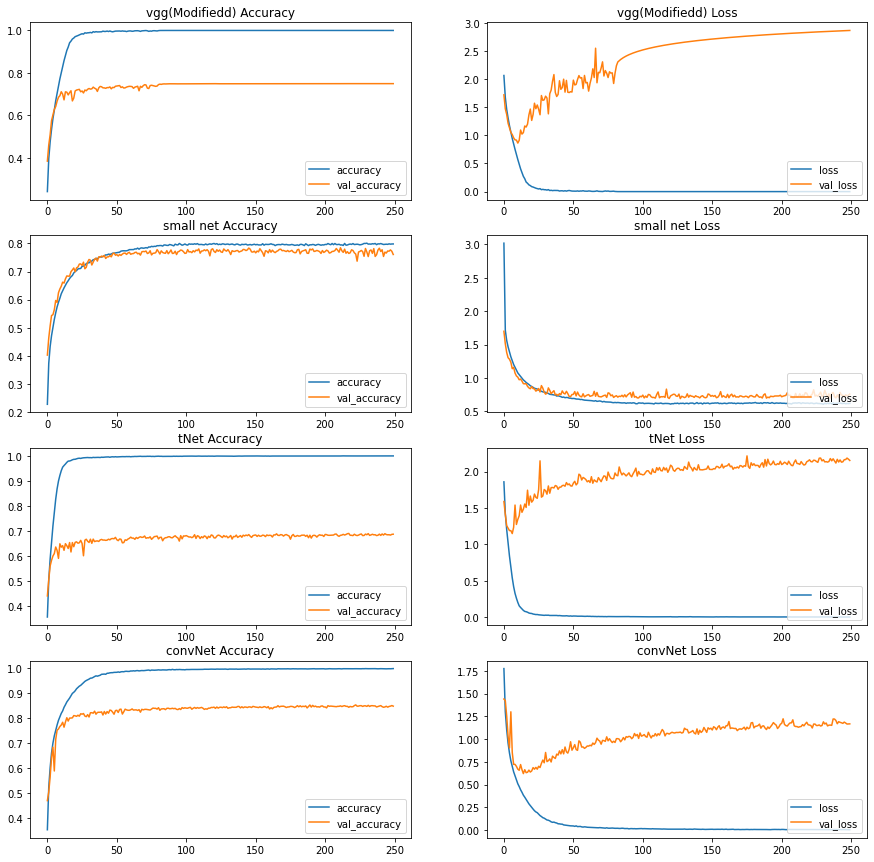

In [66]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modifiedd)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1


In [ ]:
add noraliztion
does reducing conv layers have significant impact? directly related to number of parameters